In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [26]:
df = pd.read_csv("true_car_listings.csv")
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Price    1000 non-null   int64 
 1   Year     1000 non-null   int64 
 2   Mileage  1000 non-null   int64 
 3   City     1000 non-null   object
 4   State    1000 non-null   object
 5   Vin      1000 non-null   object
 6   Make     1000 non-null   object
 7   Model    1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [28]:
df.drop(['Vin'],axis=1,inplace=True)

In [29]:
df['City'].unique()

array(['El Paso', 'Long Island City', 'Windsor', 'Lindon', 'Miami',
       'Greatneck', 'West Jordan', 'Waterbury', 'Boise', 'San Antonio',
       'Fargo', 'Santa Ana', 'Hackettstown', 'Freeport', 'Clearwater',
       'Arcadia', 'Fairlawn', 'St. Augustine', 'West Covina', 'Derby',
       'Egg Harbor', 'Columbus', 'Dumfries', 'Pasadena', 'Indianapolis',
       'Orlando', 'Tucson', 'Fort Lauderdale', 'Wappingers Falls',
       'West Palm Beach', 'Doral', 'Seffner', 'Bellflower', 'Fort Myers',
       'South Hackensack', 'Portland', 'Topeka', 'Manassas', 'Omaha',
       'Stanton', 'Wantagh', 'Milford', 'Bethesda', 'Littleton', 'Dublin',
       'Marrieta', 'Minnetonka', 'Honolulu', 'Slidell', 'Pembroke Pines',
       'Bay Shore', 'Albuquerque', 'Roslyn', 'Montclair', 'Ellicott City',
       'Garland', 'Lakewood', 'Hoffman Estates', 'Wall', 'Akron',
       'Watertown', 'Pelham', 'Homestead', 'Miami Gardens', 'Ardmore',
       'San Diego', 'Alpharetta', 'Rahway', 'Fairfax', 'Austin', 'Morrow'

In [30]:
df['State'].unique()

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD'], dtype=object)

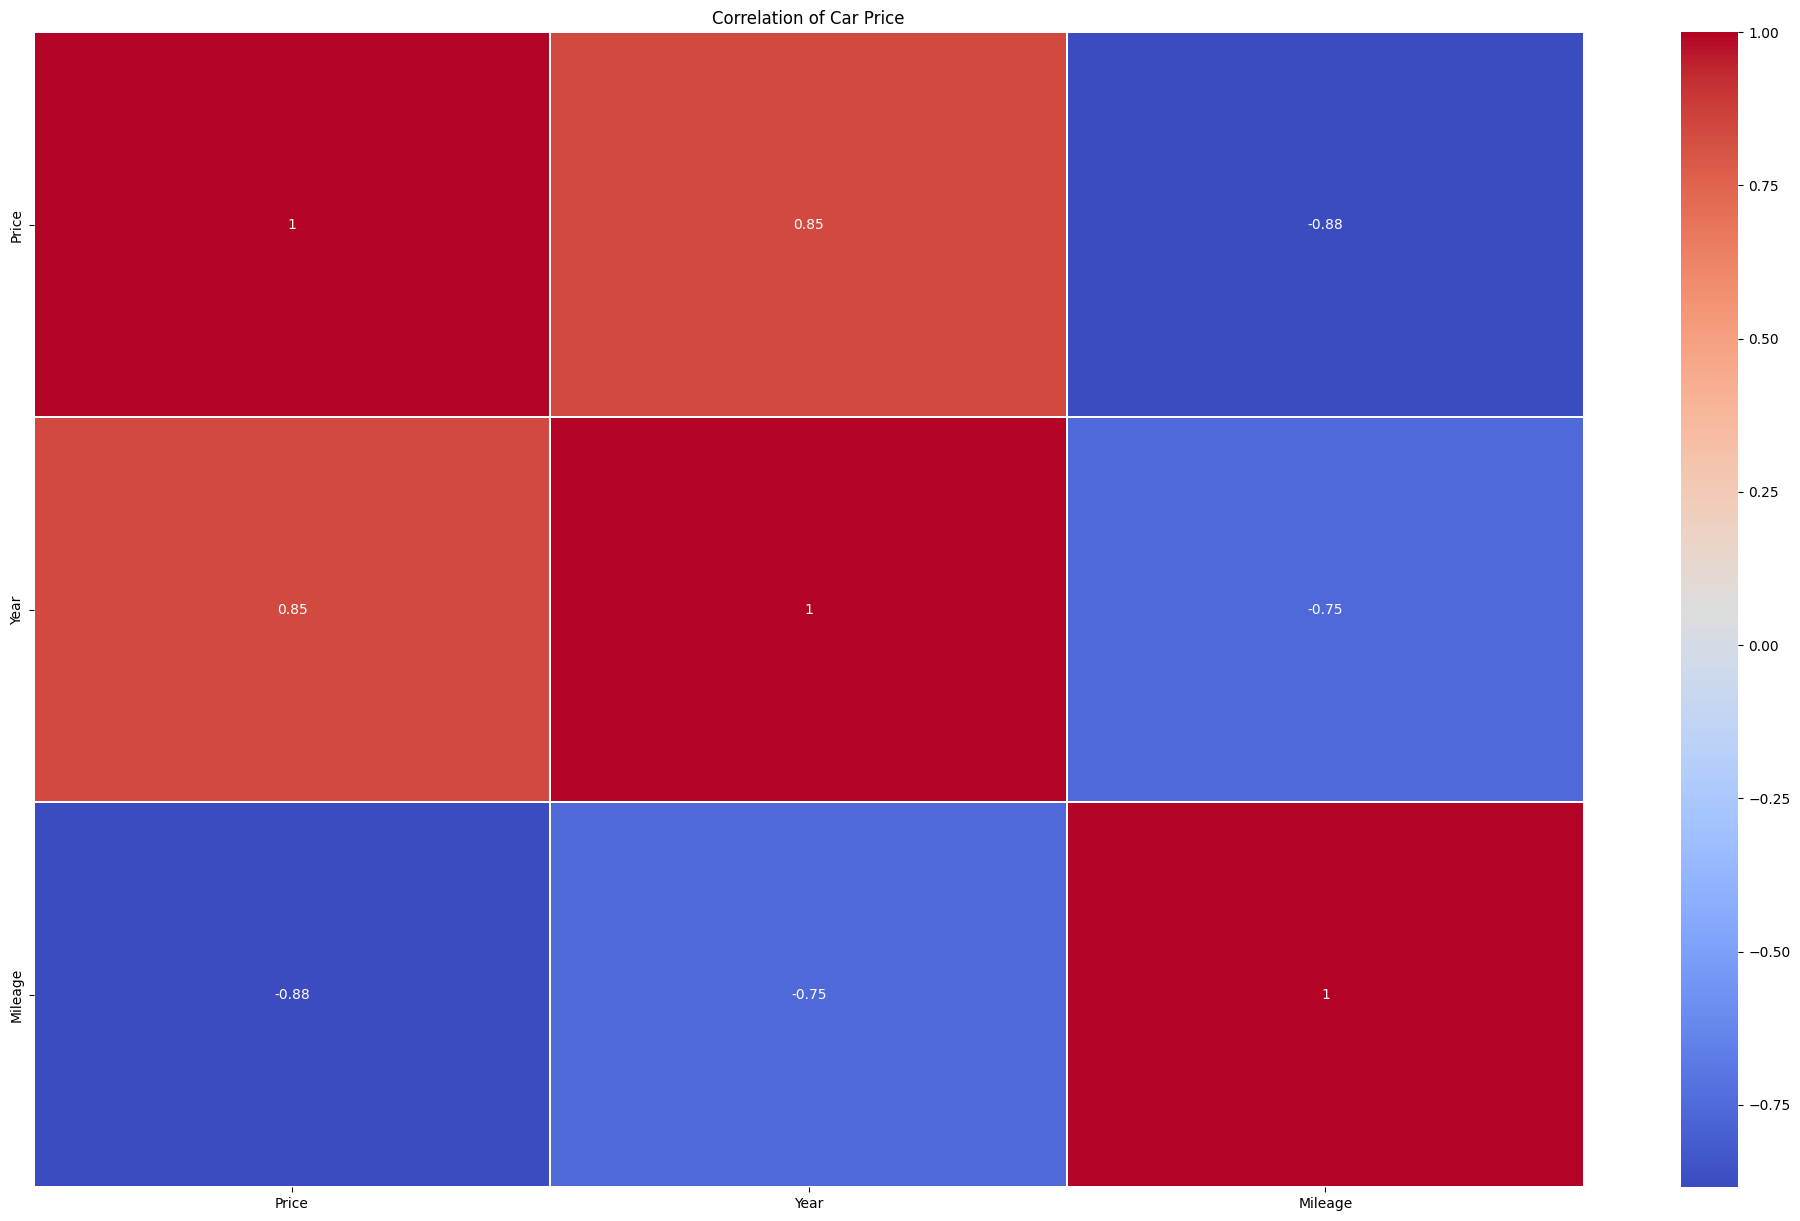

In [31]:
data_corr=df.select_dtypes(include=['int64']).corr()
plt.figure(figsize=(25,15))
sns.heatmap(data_corr,annot=True,cmap='coolwarm', linewidths=0.01)
plt.title('Correlation of Car Price')
plt.show()

In [32]:
df['Price'].describe([0.25,0.50,0.75,0.85,0.90,1])

count     1000.000000
mean     15845.532000
std       3387.770518
min       4950.000000
25%      13995.000000
50%      16494.500000
75%      17999.250000
85%      18900.000000
90%      19421.500000
100%     23995.000000
max      23995.000000
Name: Price, dtype: float64

In [33]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print("Số lượng giá trị trước khi loại bỏ ngoại lệ:", len(df))
print("Số lượng giá trị sau khi loại bỏ ngoại lệ:", len(df_no_outliers))
df_no_outliers

Số lượng giá trị trước khi loại bỏ ngoại lệ: 1000
Số lượng giá trị sau khi loại bỏ ngoại lệ: 983


,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic
...,...,...,...,...,...,...,...
995,19788,2015,28293,Dublin,OH,Acura,ILX5-Speed
996,17500,2013,35516,Milford,CT,Acura,ILX5-Speed
997,16495,2014,56228,Clinton,NJ,Acura,ILX5-Speed
998,9692,2006,86218,Fort Pierce,FL,Acura,TSXAutomatic


In [34]:
categorical_column = ['City','State','Make','Model']
df_no_outliers = pd.get_dummies(df_no_outliers, columns=categorical_column, drop_first=True)
X = df_no_outliers.drop('Price', axis=1).astype(int)
y = df_no_outliers['Price'].values

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

ones_train = np.ones((X_train.shape[0], 1))
ones_test = np.ones((X_test.shape[0], 1))
Xbar_train = np.concatenate((ones_train, X_train), axis=1)
Xbar_test = np.concatenate((ones_test, X_test), axis=1)

A = np.dot(Xbar_train.T, Xbar_train)
b = np.dot(Xbar_train.T, y_train)
w = np.dot(np.linalg.pinv(A), b)

y_pred = np.dot(Xbar_test, w)
pd.set_option('display.max_rows', None)
pred_df = pd.DataFrame({'Giá trị thực tế': y_test, 'Giá trị dự đoán': y_pred, 'Sai lệch': y_test - y_pred})
print(pred_df)
#Tính trên tập test
mae = np.mean(np.abs(y_test - y_pred))
print(f'MAE: {mae}')
mse = np.mean((y_test - y_pred) ** 2)
print(f'MSE: {mse}')
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(f'R-squared: {r2}')
y_train_pred = np.dot(Xbar_train, w)

     Giá trị thực tế  Giá trị dự đoán     Sai lệch
0              15488     15817.575136  -329.575136
1               8999      9016.229690   -17.229690
2              18380     18675.604352  -295.604352
3              18751     16680.669375  2070.330625
4              13419     12533.138724   885.861276
5              18500     17545.917147   954.082853
6              15790     15748.812073    41.187927
7              14988     17217.419959 -2229.419959
8              18712     16351.354769  2360.645231
9              18362     17895.089131   466.910869
10             15487     14940.186040   546.813960
11             18485     17403.352563  1081.647437
12             18882     19441.453763  -559.453763
13             16195     18162.909285 -1967.909285
14             15998     16942.279241  -944.279241
15             12944     10184.268330  2759.731670
16             16999     18020.431549 -1021.431549
17             17895     17099.096163   795.903837
18             15999     18987.

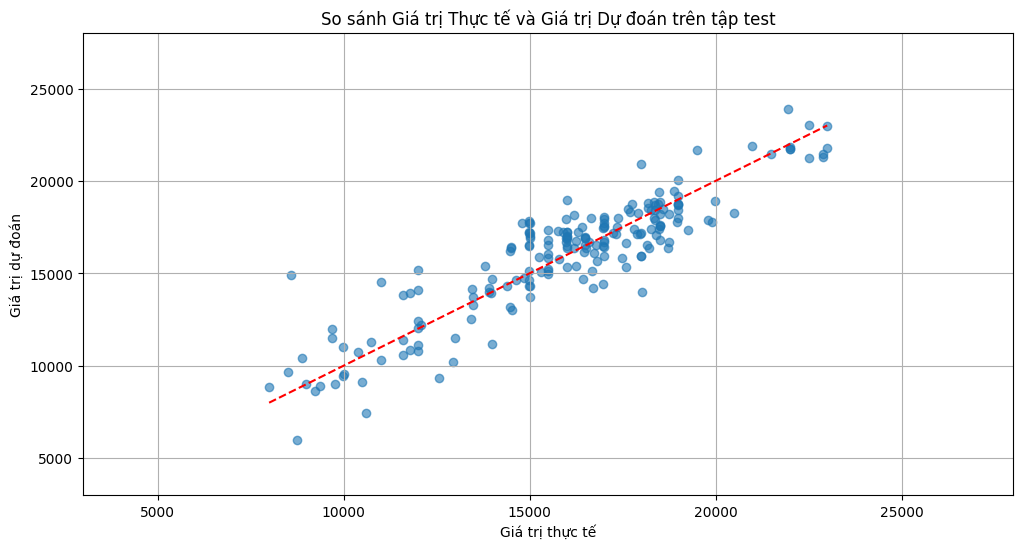

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường chuẩn
plt.title('So sánh Giá trị Thực tế và Giá trị Dự đoán trên tập test')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.grid()
plt.xlim(y_test.min() - 5000, y_test.max() + 5000)  # Điều chỉnh giới hạn trục x
plt.ylim(y_test.min() - 5000, y_test.max() + 5000)  # Điều chỉnh giới hạn trục y
plt.show()

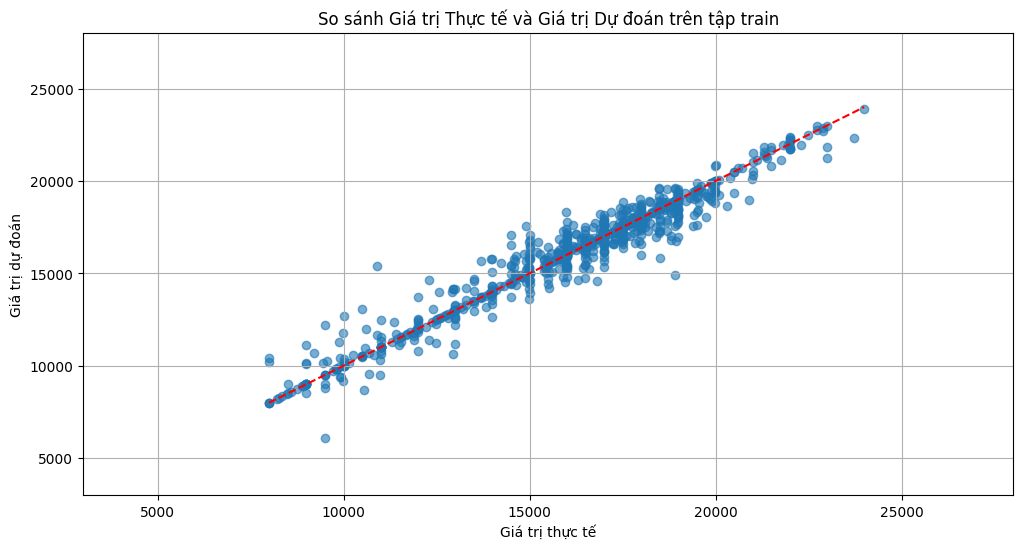

In [37]:
# Vẽ đồ thị
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Đường chuẩn
plt.title('So sánh Giá trị Thực tế và Giá trị Dự đoán trên tập train')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.grid()
plt.xlim(y_test.min() - 5000, y_test.max() + 5000)  # Điều chỉnh giới hạn trục x
plt.ylim(y_test.min() - 5000, y_test.max() + 5000)  # Điều chỉnh giới hạn trục y
plt.show()